In [1]:
!pip install wget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from collections import OrderedDict
# from google.colab import drive
# os.chdir('/content/gdrive/My Drive')
# drive.mount('/content/gdrive')

In [3]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

if os.path.exists(os.getcwd()+"\\national.json"):
    os.remove(os.getcwd()+"\\national.json")
wget.download('https://api.covid19india.org/data.json', os.getcwd()+"//national.json")

if os.path.exists(os.getcwd()+"\\states.json"):
    os.remove(os.getcwd()+"\\states.json")
wget.download('https://api.covid19india.org/states_daily.json', os.getcwd()+"//states.json")

if os.path.exists(os.getcwd()+"\\test.json"):
    os.remove(os.getcwd()+"\\test.json")
wget.download('https://api.covid19india.org/state_test_data.json', os.getcwd()+"//test.json")

'/Users/siddharthjain/Desktop/backend/testing-and-cfr//test.json'

In [4]:
dataset=pd.read_csv('./population.csv')

In [5]:
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population

,State,Population
0,Delhi,18710922
1,Haryana,28204692
2,Kerala,35699443
3,Himachal Pradesh,7451955
4,Punjab,30141373
5,Telangana,39362732
6,Goa,1586250
7,Uttarakhand,11250858
8,Chandigarh,1158473
9,Gujarat,63872399


In [6]:
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
def convert(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [7]:
dates = np.array([pd.to_datetime(i['date']+"2020") for i in json.load(open('national.json',))['cases_time_series']])
confirmed = np.array([int(i['dailyconfirmed'])for i in json.load(open('national.json',))['cases_time_series']])
deceased = np.array([int(i['dailydeceased'])for i in json.load(open('national.json',))['cases_time_series']])
recovered = np.array([int(i['dailyrecovered'])for i in json.load(open('national.json',))['cases_time_series']])

confirmed = confirmed[dates>=pd.to_datetime("03/04/20")]
deceased = deceased[dates>=pd.to_datetime("03/04/20")]
recovered = recovered[dates>=pd.to_datetime("03/04/20")]
dates = dates[dates>=pd.to_datetime("03/04/20")]

In [8]:
conf = []

for n in range(100):
    print("Iteration: ",n+1,end='\r')
    dataset = np.copy(confirmed)
    mean = 13.0+(20.9-8.7)/4*np.random.normal()
    sd = 12.7+(26.0-6.4)/4*np.random.normal()
    phi = np.sqrt(sd**2 + mean**2)
    mu = np.log(mean**2/phi)
    sigma = np.sqrt(np.log(phi**2/mean**2))
    L = lognorm(s=sigma,scale=np.exp(mu))
    for i in range(len(dataset)-1,-1,-1):
        send_forward = np.round(L.rvs(dataset[i]))
        send_forward = send_forward[i+send_forward<len(dataset)]
        dataset[i] = 0
        for j in np.unique(np.int32(send_forward)):
            dataset[i+j] += np.sum(send_forward==j)
    conf.append(dataset)

In [9]:
CFR = np.cumsum(deceased)/np.cumsum(conf,axis=1)
col_mean = np.nanmean(CFR, axis=0)
inds = np.where(np.isnan(CFR))
CFR[inds] = np.take(col_mean, inds[1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [10]:
temp=dates
dates=[]
for i in range(len(temp)):
  date=[]
  t=(str(temp[i])).split()[0]
  m=t[5:7]
  d=t[-2:]
  #print(m,t)
  date.append(d)
  date.append('/')
  date.append(m)
  date=''.join([str(elem) for elem in date])
  #print(date)
  dates.append(convert(date))

In [11]:
list(100*n2z(np.quantile(CFR,0.025,axis=0)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.9427083333333335,
 2.5,
 4.122023809523808,
 3.669028340080972,
 3.198717948717948,
 4.079410674573758,
 3.5289221806075735,
 4.253968253968254,
 3.466576332429991,
 2.9517414564908835,
 4.214233841684822,
 4.510765550239235,
 4.104609929078014,
 3.7917480585068373,
 4.488520710059171,
 4.502316443653845,
 4.960947536097836,
 4.849871921755836,
 6.29928107606679,
 6.136483262582971,
 5.912106027378805,
 6.456055890809137,
 6.371604759612404,
 6.016931741702384,
 6.108591459288775,
 5.802998154565308,
 5.932789406452962,
 5.8231909908563795,
 6.3844109979194155,
 6.116068043156045,
 6.233919017059182,
 6.333350913297369,
 6.1282505184681675,
 6.0599614058522135,
 5.81575493852742,
 5.577187132421088,
 5.50853984815075,
 5.4278039315912485,
 5.309750799707957,
 5.139369650074997,
 5.147854107482091,
 5.000104834320309,
 4.899860168112236,
 4.90452168216268,
 4.804440766532901,
 4.767013775152598,
 4.748920567698832,
 4.7750749510798345,


In [12]:
json_data = {}
cfr1_point=list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed))),
cfr2_point=list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered)))),
cfr3_point=list(100*n2z(np.median(CFR,axis=0))),
cfr3_l95=list(100*n2z(np.quantile(CFR,0.025,axis=0))),
cfr3_u95=list(100*n2z(np.quantile(CFR,0.975,axis=0))),
cfr3_l50=list(100*n2z(np.quantile(CFR,0.25,axis=0))),
cfr3_u50=list(100*n2z(np.quantile(CFR,0.75,axis=0))),
india = {
         'dates':dates,
         'cfr1_point':list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed))),
         'cfr2_point':list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered)))),
         'cfr3_point':list(100*n2z(np.mean(CFR,axis=0))),
         'cfr3_l95':list(100*n2z(np.quantile(CFR,0.025,axis=0))),
         'cfr3_u95':list(100*n2z(np.quantile(CFR,0.975,axis=0))),
         'cfr3_l50':list(100*n2z(np.quantile(CFR,0.25,axis=0))),
         'cfr3_u50':list(100*n2z(np.quantile(CFR,0.75,axis=0))),
         }
#india = OrderedDict([('dates',dates),('cfr1_point',cfr1_point),('cfr2_point',cfr2_point),('cfr3_point',cfr3_point),('cfr3_l95',cfr3_l95),('cfr3_u95',cfr3_u95),('cfr3_l50',cfr3_l50),('cfr3_u50',cfr3_u50)])
json_data['India'] = india
cfr = pd.DataFrame()
cfr['state']=['India']*len(dates)
cfr['dates']=dates
cfr['cfr1_point']=list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed)))
cfr['cfr2_point']=list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered))))
cfr['cfr3_point']=list(100*n2z(np.median(CFR,axis=0)))
cfr['cfr3_l95']=list(100*n2z(np.quantile(CFR,0.025,axis=0)))
cfr['cfr3_u95']=list(100*n2z(np.quantile(CFR,0.975,axis=0)))
cfr['cfr3_l50']=list(100*n2z(np.quantile(CFR,0.25,axis=0)))
cfr['cfr3_u50']=list(100*n2z(np.quantile(CFR,0.75,axis=0)))
cfr

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


,state,dates,cfr1_point,cfr2_point,cfr3_point,cfr3_l95,cfr3_u95,cfr3_l50,cfr3_u50
0,India,04 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,India,05 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,India,06 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,India,07 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,India,08 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,India,09 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,India,10 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,India,11 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,India,12 March,1.333333,50.000000,7.692308,2.942708,0.000000,5.000000,14.285714
9,India,13 March,1.176471,12.500000,5.555556,2.500000,0.000000,4.000000,10.000000


In [13]:
states = list(filter(lambda v:len(v)<3,list(json.load(open('states.json',))['states_daily'][0].keys())))

In [14]:
dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for st in states:
    data_confirmed[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
    data_deceased[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Deceased',json.load(open('states.json',))['states_daily'])])
    data_recovered[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Recovered',json.load(open('states.json',))['states_daily'])])

In [15]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)
/Library/Frame

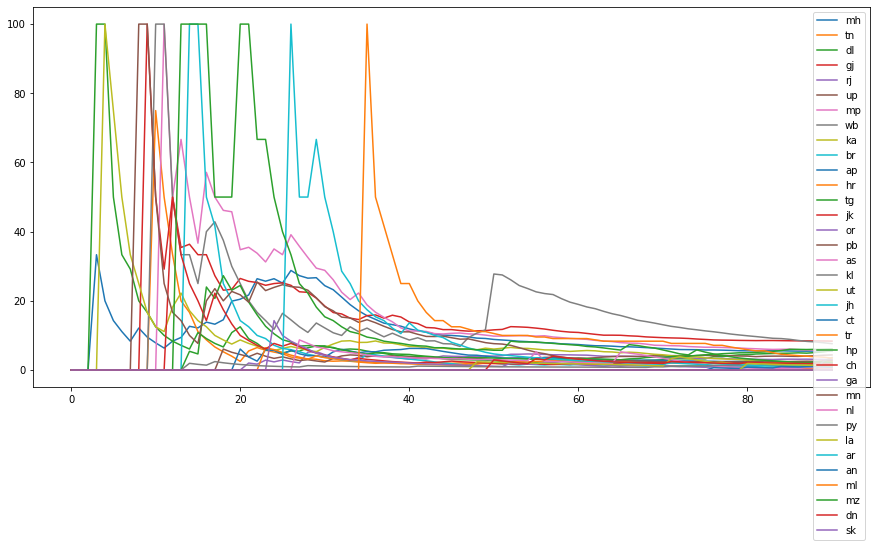

In [16]:
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
state_id = {
  "mh":"Maharashtra",
  "tn":"Tamil Nadu",
  "dl":"Delhi",
  "gj":"Gujarat",
  "rj":"Rajasthan",
  "up":"Uttar Pradesh",
  "mp":"Madhya Pradesh",
  "wb":"West Bengal",
  "ka":"Karnataka",
  "br":"Bihar",
  "ap":"Andhra Pradesh",
  "hr":"Haryana",
  "tg":"Telangana",
  "jk":"Jammu and Kashmir",
  "or":"Odisha",
  "pb":"Punjab",
  "as":"Assam",
  "kl":"Kerala",
  "ut":"Uttarakhand",
  "jh":"Jharkand",
  "ct":"Chhattisgarh",
  "tr":"Tripura",
  "hp":"Himachal Pradesh",
  "ch":"Chandigarh",
  "ga":"Goa",
  "mn":"Manipur",
  "nl":"Nagaland",
  "py":"Puducherry",
  "la":"Ladakh",
  "ar":"Arunachal Pradesh",
  "an":"Andaman and Nicobar Islands",
  "ml":"Meghalaya",
  "mz":"Mizoram",
  "dn":"Dadra and Nagar Haveli and Daman and Diu",
  "sk":"Sikkim",
}

for state in state_id.keys():
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates1=[]
    for i in range(len(temp1)):
      date=temp1[i][3:5]+'/'+temp1[i][0:2]
      dates1.append(convert(date))
    temp = {
        'dates':dates1,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[state]
    #print(a)
    json_data[str(a)] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates1
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [17]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [18]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [19]:
total_confirmed = [x['totalconfirmed'].split(' ')[0] for x in json.load(open('national.json',))['cases_time_series']] ## x_cumulative= 'totalconfirmed'
daily_confirmed = [x['dailyconfirmed'].split(' ')[0] for x in json.load(open('national.json',))['cases_time_series']] ## x1
daily_confirmed_ma=['']*7
dates=[]
daily_confirmed=list(map(int,daily_confirmed))
for i in range(7,len(daily_confirmed)):
    daily_confirmed_ma.append(sum(daily_confirmed[i-7:i])/7)
datesspace = [x['date'] for x in json.load(open('national.json',))['cases_time_series']]
for i in range(len(datesspace)):
    dates.append(datesspace[i][0:-1])
#print(total_confirmed)

In [20]:
datesspace

['30 January ',
 '31 January ',
 '01 February ',
 '02 February ',
 '03 February ',
 '04 February ',
 '05 February ',
 '06 February ',
 '07 February ',
 '08 February ',
 '09 February ',
 '10 February ',
 '11 February ',
 '12 February ',
 '13 February ',
 '14 February ',
 '15 February ',
 '16 February ',
 '17 February ',
 '18 February ',
 '19 February ',
 '20 February ',
 '21 February ',
 '22 February ',
 '23 February ',
 '24 February ',
 '25 February ',
 '26 February ',
 '27 February ',
 '28 February ',
 '29 February ',
 '01 March ',
 '02 March ',
 '03 March ',
 '04 March ',
 '05 March ',
 '06 March ',
 '07 March ',
 '08 March ',
 '09 March ',
 '10 March ',
 '11 March ',
 '12 March ',
 '13 March ',
 '14 March ',
 '15 March ',
 '16 March ',
 '17 March ',
 '18 March ',
 '19 March ',
 '20 March ',
 '21 March ',
 '22 March ',
 '23 March ',
 '24 March ',
 '25 March ',
 '26 March ',
 '27 March ',
 '28 March ',
 '29 March ',
 '30 March ',
 '31 March ',
 '01 April ',
 '02 April ',
 '03 April ',

In [21]:
dates_dict = {}
count=1
for i in dates:
  if i not in dates_dict.keys():
    dates_dict[i]=count
    count+=1
#print(dates_dict)

In [22]:
def convert(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [23]:
population['Population'][36]

1371360350

In [24]:
datest=[x['updatetimestamp'].split(' ')[0] for x in json.load(open('national.json',))['tested']]
#totalcumulative_tested = [] #y_cumulative
y_cumulative1=[x['totalsamplestested'] for x in json.load(open('national.json',))['tested']]
test_per_million=['']*len(dates)
dates1=[]
for i in (datest):
  dates1.append(convert(i))
datestest = []
datestest.append(dates1[0])
y_cumulative = []
tested_cum=['']*len(dates)
y_cumulative.append(y_cumulative1[0])
### y = 'totalsamplestested'
#daily_tested = [] # y1 (y_cumulative2-ycumulative1)
for i in range(1,len(dates1)):
  if (dates1[i]==dates1[i-1]):
    y_cumulative[-1]=y_cumulative1[i]
  else:
    datestest.append(dates1[i])
    y_cumulative.append(y_cumulative1[i])
daily_tested=[]
daily_tested_final=['']*len(dates)
daily_confirmed_final=['']*len(dates)
daily_confirmed_ma_final=['']*len(dates)
daily_tested.append(y_cumulative[0])
for i in range(1,len(y_cumulative)):
  if (len(y_cumulative[i])!=0):
    a=int(y_cumulative[i])-int(y_cumulative[i-1])
    daily_tested.append(a)
    #test_per_million.append(int(y_cumulative[i])*1000000/int(population['Population'][36]))
  else:
    y_cumulative[i]=y_cumulative[i-1]
    daily_tested.append(0)
    #test_per_million.append('')
var=0
pos_rate_cum=['']*len(dates)
daily_pos_rate=['']*len(dates)
for i in range(len(datestest)):
  for j in range(var,len(dates)):
    if (datestest[i]==dates[j]):
      if (int(daily_tested[i])!=0):
        daily_pos_rate[j]=(int(daily_confirmed[j])*100/int(daily_tested[i]))
        pos_rate_cum[j]=(int(total_confirmed[j])*100/int(y_cumulative[i]))
        test_per_million[j]=(int(y_cumulative[i])*1000000/int(population['Population'][36]))
        daily_tested_final[j]=daily_tested[i]
        tested_cum[j]=y_cumulative[i]
      else:
        daily_pos_rate[j]=('')
        #test_per_million.append('')
      var=j
      break
#print(len(y_cumulative))
#daily_confirmed_7day_moving = []
## India : date : []
##        cumulative pos rate : [] x_cum/y_cum
##        daily_pos_rate : []  (after taking moving avg) -> 7 observation moving avg
## daily confirmed : [] (7 day moving average)

In [25]:
print(len(daily_confirmed_ma))

136


In [26]:
len(daily_pos_rate)

136

In [30]:
daily_pos_rate_ma=['']*len(dates)
from statistics import mean
count=0
temp=['']*len(dates)

i=0
l=len(dates)
#print(datestest)
# for i in range(len(dates)):
#print(daily_pos_rate)

while i<l:
  # print(i)
  count+=1
  for j in range(len(datestest)):
    if (dates[i]==datestest[j]):
      a=daily_pos_rate[i]
      temp[i]=str(a)
     
  i=i+1

In [31]:
for i in range(7,len(daily_confirmed)):
    sum1=0
    sum2=0
    for j in range(7):
      if (len(str(daily_confirmed[i-j]))!=0 and len(str(daily_tested_final[i-j]))!=0):
        sum1+=int(daily_confirmed[i-j])
        sum2+=int(daily_tested_final[i-j])
    if (sum2!=0):
      daily_pos_rate_ma[i]=sum1*100/sum2

In [32]:
india_dates = dates
india_total_cases=total_confirmed
india_daily_confirmed = daily_confirmed
india_daily_confirmed_ma = daily_confirmed_ma
india_total_confirmed = total_confirmed
india_daily_pos_rate_ma = daily_pos_rate_ma
india_pos_rate_cum = pos_rate_cum
india_daily_pos_rate = daily_pos_rate
india_test_per_million=test_per_million
india_daily_tested=daily_tested_final
india_tested_cum = tested_cum
# nationwide={
#     'dates':dates,
#     'daily_confirmed':daily_confirmed,
#     'daily_confirmed_ma':daily_confirmed_ma,
#     'daily_total':total_confirmed,
#     'daily_positve_rate_ma':daily_pos_rate_ma
# }
# with open('nation.json', 'w') as outfile:
#     json.dump(nationwide, outfile)

In [33]:
print(len(india_total_confirmed ))

136


### State Level Data

In [34]:
population=population.set_index('State')

In [ ]:
testing = {}
states = np.unique([x['state'] for x in json.load(open('test.json',))['states_tested_data']])
#df=pd.DataFrame()
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]
for st in states:
#   print(st)
  state_dates = []
  test_per_million=['']*len(dates)
  pos_cum=['']*len(dates)
  pos_rate_cum=['']*len(dates)
  daily_pos=['']*len(dates)
  daily_pos_ma=['']*len(dates)
  daily_tested=['']*len(dates)
  daily_pos_rate=['']*len(dates)
  daily_pos_rate_ma=['']*len(dates)
  tested_cum=['']*len(dates)
  tested_daily=['']*len(dates)
  anda=0
  state_date = [x['updatedon'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])]
  #rates = [x['testpositivityrate'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])]
  #print(state_date)
  for i in (state_date):
    state_dates.append(convert(i))
  for i in range(len(dates)):
    for j in range(len(state_dates)):
      sum=0
      count=0
      sum1=0
      count1=0
      if (dates[i]==state_dates[j]):
        pos_cum[i] = [x['positive'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])][j]
        tested_cum[i] = [x['totaltested'] for x in filter(lambda v: v['state'] == st,json.load(open('test.json',))['states_tested_data'])][j]
        if (j==0):
          daily_pos[i]=pos_cum[j]
          daily_tested[i]=tested_cum[j]
        if(len(pos_cum[i])!=0 and len(pos_cum[i-1])!=0):
          daily_pos[i]=int(pos_cum[i])-int(pos_cum[i-1]) 
          #print(daily_pos[i])
        if(st=='Andaman and Nicobar Islands'):
          daily_pos[i]=int(pos_cum[i])-anda
          anda=int(pos_cum[i])
        if(len(tested_cum[i])!=0 and len(tested_cum[i-1])!=0):
          daily_tested[i]=(int(tested_cum[i])-int(tested_cum[i-1]))
          test_per_million[i]=int(tested_cum[i])*1000000/int(population["Population"][st])
          if (len(str(daily_pos[i]))!=0 and len(str(tested_cum[i]))!=0):
            pos_rate_cum[i]=int(pos_cum[i])*100/int(tested_cum[i])
          #if(st=='Maharashtra'):
            #print(tested_cum[i],daily_tested[i])
        if (j>6):
          for k in range(0,7):
            if (len(str(daily_pos[i-k]))!=0):
              count+=1
              sum+=int(daily_pos[i-k])
#               print(sum)
          if (count!=0):
            daily_pos_ma[i]=sum/count
          if(len(str(daily_tested[i]))!=0 and daily_tested[i]!=0 and len(str(daily_pos[i]))!=0 ):
            daily_pos_rate[i]=(int(daily_pos[i])*100/int(daily_tested[i]))
  for i in range(7,len(daily_pos)):
    sum1=0
    sum2=0
    for j in range(7):
      if (len(str(daily_pos[i-j]))!=0 and len(str(daily_tested[i-j]))!=0):
        sum1+=int(daily_pos[i-j])
        sum2+=int(daily_tested[i-j])
    if (sum2!=0):
      daily_pos_rate_ma[i]=sum1*100/sum2
  if(st=="Maharashtra"):
    print(st,daily_pos_rate_ma)
  for i in range(len(dates)):
    csv_dates.append(dates[i])
    csv_total_cases.append(pos_cum[i])
    csv_states.append(st)
    csv_positivity_rate_cumulative.append(pos_rate_cum[i])
    csv_daily_positive_cases.append(daily_pos[i])
    csv_daily_positivity_rate.append(daily_pos_rate[i])
    csv_daily_positive_cases_ma.append(daily_pos_ma[i])
    csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
    csv_test_per_million.append(test_per_million[i])
    csv_daily_tested.append(daily_tested[i])
    csv_cum_tested.append(tested_cum[i])
  testing[st] = {
                    'dates':dates,
                    'cum_positive_cases':pos_cum,
                    'cum_positivity_rate':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'test_per_million':test_per_million,
                    'daily_tests': daily_tested,
                    'cum_tests': tested_cum    
                  }
testing['India'] = {
                    'dates': india_dates,
                    'cum_positive_cases':india_total_cases,
                    'cum_positivity_rate': india_pos_rate_cum,
                    'daily_positive_cases': india_daily_confirmed,
                    'daily_positivity_rate': india_daily_pos_rate,
                    'daily_positive_cases_ma': india_daily_confirmed_ma,
                    'daily_positivity_rate_ma': india_daily_pos_rate_ma,
                    'test_per_million':india_test_per_million,  
                    'daily_tests':india_daily_tested,
                    'cum_tests':india_tested_cum   
                  }
for i in range (len(dates)):
    csv_dates.append(dates[i])
    csv_states.append('India')
    csv_total_cases.append(india_total_cases[i])
    csv_positivity_rate_cumulative.append(india_pos_rate_cum[i])
    csv_daily_positive_cases.append(india_daily_confirmed[i])
    csv_daily_positivity_rate.append(india_daily_pos_rate[i])
    csv_daily_positive_cases_ma.append(india_daily_confirmed_ma[i])
    csv_daily_positivity_rate_ma.append(india_daily_pos_rate_ma[i])
    csv_test_per_million.append(india_test_per_million[i])
    csv_daily_tested.append(india_daily_tested[i])
    csv_cum_tested.append(india_tested_cum[i])


Maharashtra ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 4.526252263126132, 4.526252263126132, 4.526252263126132, 3.3528986089893063, 7.304944670121865, 5.76083954708644, 5.766627560689469, 7.289293849658314, 7.508757469606429, 6.825529078486919, 8.057481112236156, 5.514563106796117, 6.071703932151118, 6.988226357766806, 6.7190151580521755, 6.832247995263979, 6.00809082604724, 8.152888798947687, 8.575074853973396, 10.385353179710075, 8.81668416008762, 8.740118797731231, 8.808323639653613, 10.101726993139343, 8.316819546875319, 9.345664002551173, 8.436504104297441, 9.217126646250962, 10.878745224210737, 11.706903055450773, 12.784441206142809, 13.274619127099683, 12.789182419739715, 12.060209822107344, 20.63118322121092, 18.866719192521455, 18.051302849031735, 17.

In [37]:
from datetime import datetime
testing['datetime']=str(datetime.now())
with open('positivity_Rate.json', 'w') as outfile:
    json.dump(testing, outfile,indent=4)

In [38]:
df=pd.DataFrame()
df['dates']=csv_dates
df['state']=csv_states
df['cum_positive_cases']=csv_total_cases
df['cum_positivity_rate']=csv_positivity_rate_cumulative
df['daily_positive_cases']=csv_daily_positive_cases
df['daily_positivity_rate']=csv_daily_positivity_rate
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma
df['test_per_million']=csv_test_per_million
df['daily_tests']=csv_daily_tested
df['cum_tested']=csv_cum_tested

In [39]:
df.to_csv('positivity_Rate.csv',index=False)